# Left are the names of each pollutant used in raw data. Right are the attributes which will be used to get the values of concentration of each pollutant. 

carbon_monoxide --> co_conc
sulphur_dioxide --> so2_conc
nitrogen_dioxide --> no2_conc   
ozone --> o3_conc
particulate_matter_2.5um --> pm2p5_conc
particulate_matter_10um  -->  pm10_conc  

nitrogen_monoxide --> no_conc

In [1]:
from myFunctions import getMean, DIYColorMap
# from myFunctions import getTest 
# from matplotlib import colors
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

In [2]:
# First, we need to know that name of the dataset, the timescale (Currently we have only tested daily scale). Now we just declare them as constants, while in the future they will be input by users. 

ds_name = 'cams-europe-air-quality-forecasts'
ds_time = '2022-01-01/2022-01-01'  # daily sum
# ds_time = '2021-01-01/2021-12-31'  # annual sum

# Then the name of one air pollutant. Now we just declare it as constant, while in the future it will be input by users. 
ds_variable = 'particulate_matter_2.5um'

# Here we call the get_Mean function, which downloads the raw data from web service as well as calculates the mean value of the concentration in the given time period. 
# Then the return of the function assigns values which will be used later. 
# mean_data contains the mean values of concentration; latitude and longitude are simply retrieved from raw data; rdata is the raw data downloaded. 
[mean_data, latitude, longitude, rdata]= getMean.get_mean(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)

2022-06-05 21:16:14,176 INFO Welcome to the CDS
2022-06-05 21:16:14,177 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2022-06-05 21:16:14,212 INFO Request is queued
2022-06-05 21:16:15,251 INFO Request is running
2022-06-05 21:16:16,787 INFO Request is completed
2022-06-05 21:16:16,788 INFO Downloading https://download-0001-ads-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.cams_regional_fc.retrieve-1654456573.3102772-4319-11-c0ac6473-1461-4c94-b171-e04b6eeadff3.nc to download.nc (26.9M)
2022-06-05 21:16:24,289 INFO Download rate 3.6M/s   


In [3]:
# This cell block can be ignored, which is only used to test. 
# rdata.o3_conc.values
print(mean_data.shape)
print(mean_data)
# c = mean_data(mean_data["longitude"] > 72)
# print(c)

(420, 700)
[[71.269104 72.14865  72.920654 ... 68.62683  68.63406  68.6521  ]
 [72.832756 73.608795 74.504234 ... 68.612    68.623985 68.630226]
 [74.27153  74.97166  75.68128  ... 68.42454  68.56926  68.39177 ]
 ...
 [76.80165  76.59128  76.43562  ... 82.71593  82.474434 82.17025 ]
 [76.40402  76.17898  75.77123  ... 81.27091  81.414604 81.18229 ]
 [76.13003  75.75271  75.631226 ... 79.51651  80.39845  80.23396 ]]


The daily threshold of ozone is 70 μg/m3


c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\m1865\.conda\envs\APICDS\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\Users\m1865\.conda\envs\APICDS\lib\site-p

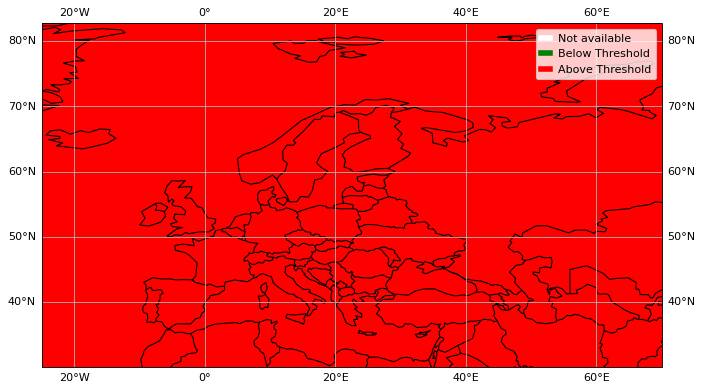

In [4]:
# Now we should create a custom colorbar to use in the output plot. 
# Since that we only need to check if the concentration of a pollutant on each coordinate surpasses its AQG or not, we simply use two colors to form our colormap. 

# Below we define that green color presents the concentration below the AQG while red above the AQG. 
# The timescale is used in ColorMap_Threshold to fetch the corresponding AQG of input pollutant. It should be either "Daily" or "Annual". 
# We should let users to input GoodColor, BadColor, d_timescale these three formal parameters. 
GoodColor = 'green'
BadColor = 'red'
d_timescale = 'Daily'

# Below we use three functions from DIYColorMap.py to complete our custom colormap. Check DIYColorMap.py for more information. 
cmap = DIYColorMap.ColorMap_Color(GoodColor=GoodColor,BadColor=BadColor)
bounds = DIYColorMap.ColorMap_Threshold(ds_variable=ds_variable,d_timescale=d_timescale)
norm = DIYColorMap.ColorMap_Norm(d_bounds=bounds,d_cmap=cmap)
threshold = bounds[1]

# Below is used to test if the fetched AQG is correct. 
print("The daily threshold of " + ds_variable + " is " + str(threshold) + " μg/m3")

# Finally, we are about to plot our figure. 
plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())

img = plt.contourf(longitude, latitude, mean_data, cmap=cmap, norm=norm,
             transform=ccrs.PlateCarree())

# Below discusses two choices of legends, say, to add a colorbar or a normal legend. We have chosen to use legend instead of colorbar. Can be ignored these comments. 

# # Colorbar (Not possible to force equally divide the colorbar, for example, 0-70 with the same height as 70-100 in colorbar)
# plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, threshold, 100])

# # Eliminate the overlapping between colorbar and output plot
# plt.colorbar(img,fraction=0.046, pad=0.06)

# # Legends
# # From https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

# Option 1: Below use marks (Not good result hence abandoned)

# legend_elements = [
#                     Line2D([0], [0], marker='o', color='w', label='Below Threshold', markerfacecolor=GoodColor, markersize=5),
#                     Line2D([0], [0], marker='o', color='w', label='Above Threshold', markerfacecolor=BadColor, markersize=5)
#                           ]

# Option 2: Use line and set linewidth and linelength

legend_elements = [ Line2D([0], [0], color='w', label='Not available', linewidth=5),
                    Line2D([0], [0], color=GoodColor, label='Below Threshold', linewidth=5),
                    Line2D([0], [0], color=BadColor, label='Above Threshold', linewidth=5)
                          ]

# Below plots the legend and adjust the line length inside legend. 
ax.legend(handles=legend_elements,handlelength=0.8)

# Below is some additional configures of plot. 
ax.set_extent([70,-25,30,80])
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# # Below use colored world basemap, but the result colormap will completely overwrite the basemap. Hence abandoned. 
# ax.stock_img()

# Add grids to the plot. 
ax.gridlines(draw_labels=True)

plt.show()